In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from sklearn.cluster import AgglomerativeClustering, DBSCAN

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder_f as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

In [53]:
import netCDF4
netCDF4.__version__

'1.3.1'

In [92]:
tau = 9

n_components_sst = 98

link_caus = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(tau))
link_corr = np.load("./link_rotated_station/best_link_corr_1976_2010_{}.npy".format(tau))

# best links from causality analysis

In [81]:
link_caus

array([[ 54, -13],
       [ 27, -11],
       [ 67,  -9],
       [ 30, -10],
       [ 77,  -7],
       [  2,  -8],
       [  4,  -2],
       [ 93,  -2],
       [ 46,  -7],
       [ 50,  -3],
       [ 20, -10],
       [ 86,  -2],
       [ 66,  -3],
       [ 64,  -2]])

# best links from correlation analysis

In [82]:
link_corr

array([[ 22, -12],
       [ 71,  -4],
       [ 70, -12],
       [ 78,  -6],
       [ 66, -12],
       [  7,  -4],
       [ 70,  -2],
       [ 36, -11],
       [ 67, -10],
       [ 66,  -2],
       [ 40, -11]])

In [34]:
df = pd.DataFrame()

In [35]:
for k in range(len(link_caus)):
    df['caus'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_caus[k,0]-1])
    df['caus'+str(k)] = df['caus'+str(k)].shift(abs(link_caus[k,1]))
#df = df.dropna()

In [36]:
for k in range(len(link_corr)):
    df['corr'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_corr[k,0]-1])
    df['corr'+str(k)] = df['corr'+str(k)].shift(abs(link_corr[k,1]))


In [37]:
df = df.dropna()

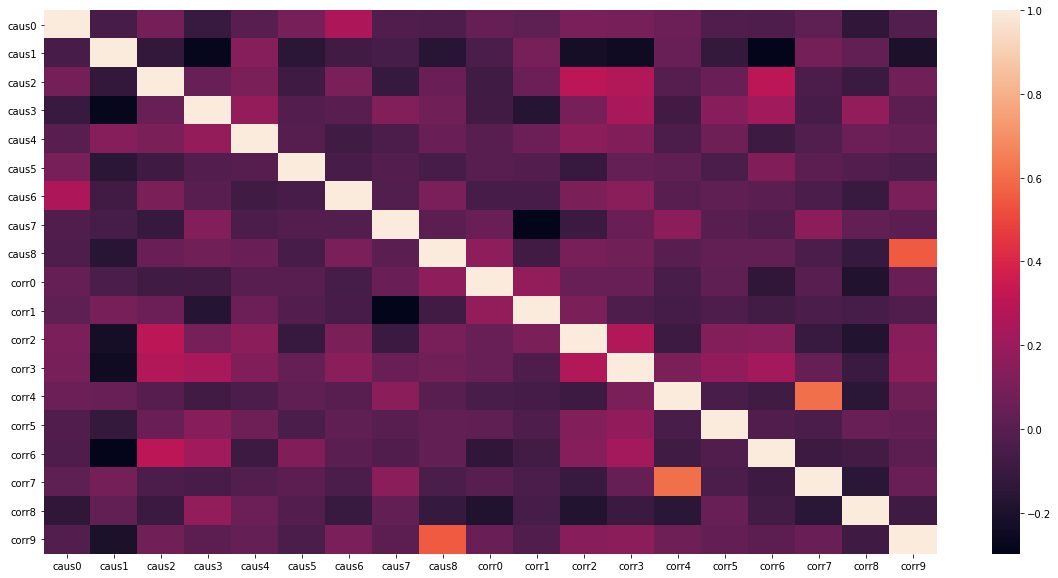

In [14]:
sns.heatmap(df.corr())

In [15]:
df.corr()

,caus0,caus1,caus2,caus3,caus4,caus5,caus6,caus7,caus8,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
caus0,1.000000,-0.052485,0.088494,-0.101836,0.005106,0.095162,0.258396,-0.029013,-0.034203,0.044030,0.021299,0.107253,0.095582,0.058252,-0.024547,-0.030064,0.017674,-0.133065,-0.019191
caus1,-0.052485,1.000000,-0.121379,-0.282573,0.138472,-0.150260,-0.073966,-0.058241,-0.159612,-0.041378,0.095161,-0.222916,-0.246272,0.047778,-0.119920,-0.288047,0.089685,0.026731,-0.206203
caus2,0.088494,-0.121379,1.000000,0.049979,0.112537,-0.084369,0.109416,-0.112622,0.056135,-0.079657,0.057878,0.301886,0.274779,-0.004295,0.055900,0.304270,-0.035185,-0.095593,0.079687
caus3,-0.101836,-0.282573,0.049979,1.000000,0.186569,-0.017772,-0.000506,0.132943,0.078205,-0.071268,-0.168909,0.096043,0.240203,-0.069868,0.144027,0.221049,-0.051168,0.182995,0.014770
caus4,0.005106,0.138472,0.112537,0.186569,1.000000,-0.007381,-0.076987,-0.038488,0.056107,0.005590,0.059313,0.153896,0.127873,-0.038578,0.062556,-0.087807,-0.020247,0.060672,0.037728
caus5,0.095162,-0.150260,-0.084369,-0.017772,-0.007381,1.000000,-0.050215,-0.016600,-0.050036,0.001188,-0.015319,-0.107883,0.040422,0.023561,-0.041039,0.127436,0.014066,-0.014113,-0.043108
caus6,0.258396,-0.073966,0.109416,-0.000506,-0.076987,-0.050215,1.000000,-0.019104,0.104514,-0.059312,-0.050342,0.108621,0.151563,0.003358,0.023270,0.007120,-0.042993,-0.104091,0.105659
caus7,-0.029013,-0.058241,-0.112622,0.132943,-0.038488,-0.016600,-0.019104,1.000000,0.010653,0.056922,-0.297922,-0.097035,0.056620,0.156965,0.005894,-0.028727,0.158402,0.027404,0.015272
caus8,-0.034203,-0.159612,0.056135,0.078205,0.056107,-0.050036,0.104514,0.010653,1.000000,0.166410,-0.073553,0.098462,0.075827,0.003663,0.031398,0.028918,-0.040004,-0.112950,0.550692
corr0,0.044030,-0.041378,-0.079657,-0.071268,0.005590,0.001188,-0.059312,0.056922,0.166410,1.000000,0.180078,0.050324,0.047885,-0.044425,0.024599,-0.133399,0.000619,-0.183535,0.053480


In [38]:
df

,caus0,caus1,caus2,caus3,caus4,caus5,caus6,caus7,caus8,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
16,-5.278854,10.111481,-0.486003,-9.869989,-13.014371,-9.413292,0.148731,2.721528,-10.760820,-2.698197,-4.681585,-7.824094,2.429982,-5.990024,-5.255343,-13.826973,-1.943027,6.184600,-15.775804
17,-2.927974,9.697466,0.346411,-12.663927,-6.269978,-13.700781,-0.575278,-0.408153,-12.714887,-4.957855,-1.156871,-11.272936,2.059068,-1.943027,-4.589926,-21.264517,-6.063921,9.528548,-12.271638
18,-6.515667,9.300309,11.874294,-11.894461,-11.547838,-6.220252,2.260779,-0.122292,-15.775804,-3.581042,-1.926728,-4.411907,-2.913566,-6.063921,1.458429,-20.147311,-3.026702,10.713586,-11.935809
19,-3.615150,6.464252,10.379464,-4.961556,-10.688161,-7.219466,0.475911,0.847508,-12.271638,-4.101384,-1.423962,2.516555,-11.795920,-3.026702,3.391049,-13.430613,3.323858,11.410042,-8.837235
20,-2.764311,9.159834,-1.788178,-6.864489,-9.362783,-7.517527,-9.743694,-3.608239,-11.935809,2.833674,3.995463,1.374535,-2.100632,3.323858,4.136915,-5.357243,7.547993,2.571724,-0.765283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2.551293,-2.136136,0.504892,-17.946613,-3.086408,-5.074096,-2.183739,-12.784574,5.074627,7.071366,9.530576,12.795432,8.388885,0.557484,1.497233,8.900013,-5.166102,-11.190755,3.338350
416,3.776886,-3.335470,0.163724,-18.577137,1.493507,5.903873,5.222600,-13.071912,5.808960,3.914347,7.933528,15.919591,6.222165,-5.166102,7.334140,9.060243,-7.149532,-12.274034,0.053230
417,1.430512,-4.688580,6.602839,-16.345269,3.325310,5.508795,2.774503,-12.075759,3.338350,0.818568,9.984722,6.496336,7.288739,-7.149532,12.819750,2.315612,-5.746555,-6.410530,3.352300
418,0.627683,-8.323340,14.969797,-7.025120,9.071801,3.487452,-6.777768,-9.150458,0.053230,4.569971,2.836355,4.215877,10.142039,-5.746555,11.864073,0.636735,5.054293,-5.361931,0.509139


In [42]:
x = np.arange(len(df))

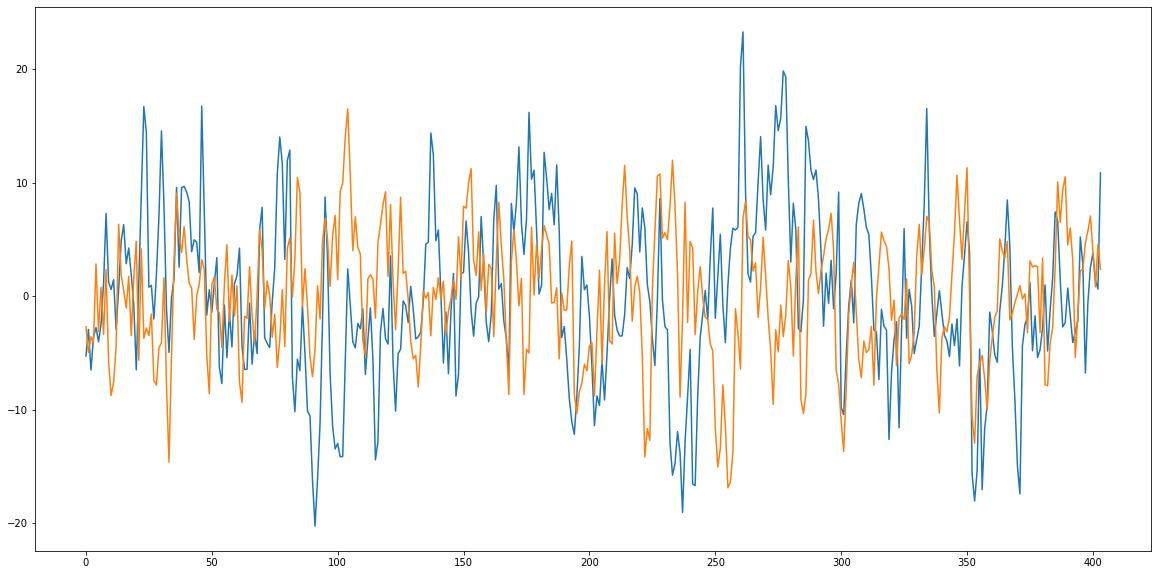

In [48]:
plt.plot(x,df.iloc[:,0],x, df.iloc[:,9])

In [93]:
train_start = 1976
validation_end = 2010

temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",train_start,validation_end)
data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)

In [94]:
test_start = 2011
test_end = 2015

temporal_limits_test = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
data_sst_test = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits_test, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",test_start,test_end)

In [62]:
np.save("data_sst.npy", data_sst)
np.save("V.npy", V)
np.save("ts.npy", ts)
np.save("avg.npy", avg)
np.save("std.npy", std)
np.save("data_sst_test.npy", data_sst_test)

In [63]:
df_sst.to_csv('df_sst.csv')

In [95]:
link = link_caus

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=500, min_samples_leaf = 50)
model.fit(x_train, y_train)

start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

# Performance of causality

In [96]:
math.sqrt(mean_squared_error(y_pred, y_test))

36.88983710209514

# %10.963

In [97]:
link = link_corr

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=500, min_samples_leaf = 50)
model.fit(x_train, y_train)


start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

# Performance of correlation

In [98]:
math.sqrt(mean_squared_error(y_pred, y_test))

39.82575708034905

# %9.84

# hybrid method

In [99]:
for i in range(len(link_corr)):
    if not np.array(link_corr == list(link_corr[i])).all(axis=1).all():
        link_caus = np.concatenate((link_caus, np.reshape(link_corr[i,:],(1,2))))
link_hybrid = link_caus
link_caus = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(tau))

In [100]:
l, b, m = ff.forward_feature_V(count, data_sst, link_hybrid, V, tau)

link = l

start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = m.predict(x_test)

In [101]:
math.sqrt(mean_squared_error(y_pred, y_test))

27.7410508417884

# %7.29

In [29]:
l

array([[ 91,  -8],
       [  4, -16],
       [ 14,  -9],
       [ 56,  -9],
       [ 86,  -7],
       [ 26, -16],
       [ 24, -10],
       [ 39, -11]])

In [25]:
l

array([[ 91,  -8],
       [  4, -16],
       [ 14,  -9],
       [ 56,  -9],
       [ 86,  -7],
       [ 26, -16],
       [ 24, -10],
       [ 39, -11]])

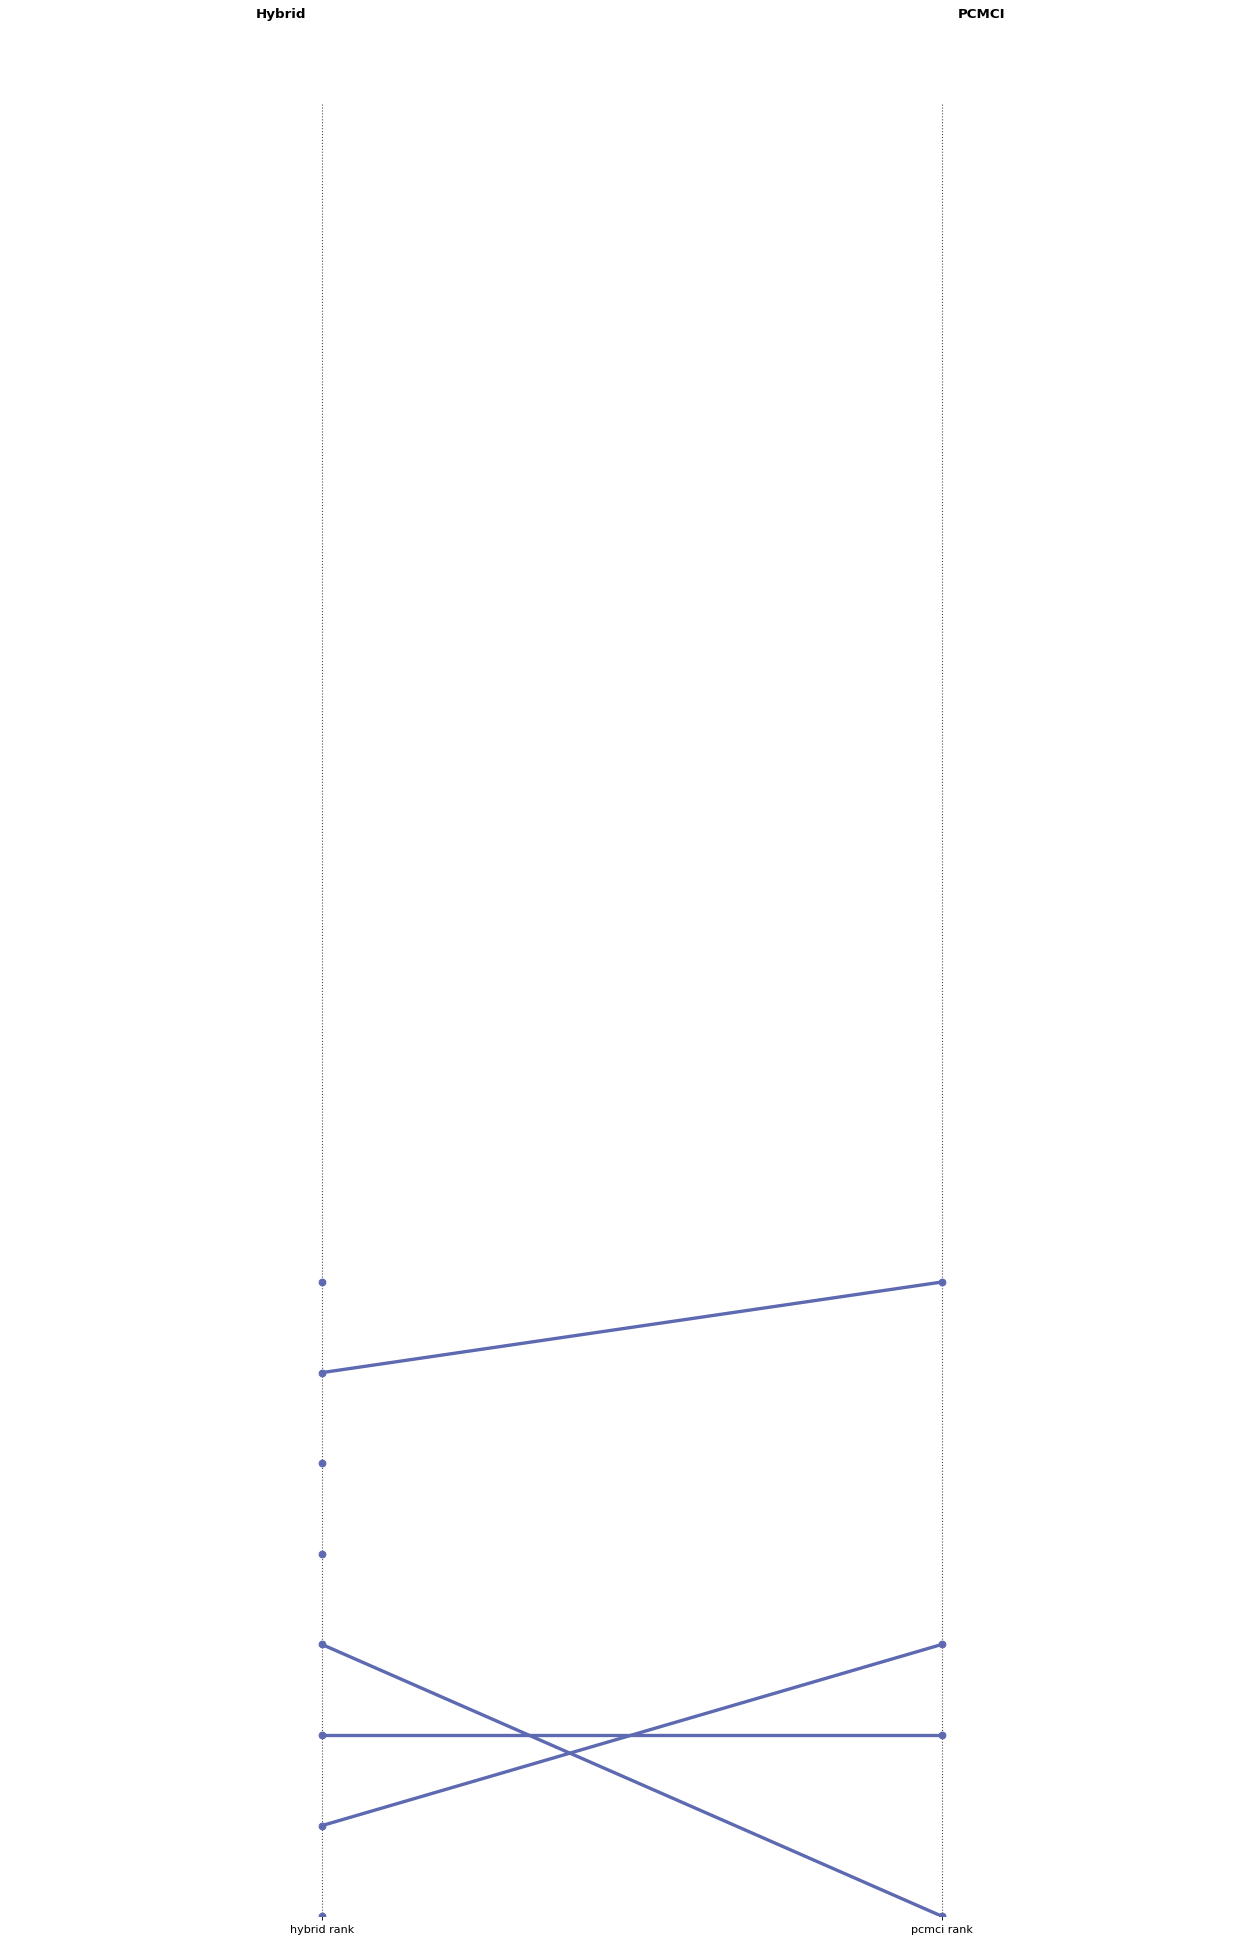

In [193]:
rank = []
for i in range(len(l)):
    if len(np.where((link_caus == list(l[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((link_caus == list(l[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'hybrid_rank':np.arange(len(l)), 'parcorr_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['parcorr_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['hybrid_rank'], ranks_merged['parcorr_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 21, 'Hybrid', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 21, 'PCMCI', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,20))
ax.set_xticks([1,3])
ax.set_xticklabels(["hybrid rank","pcmci rank" ])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

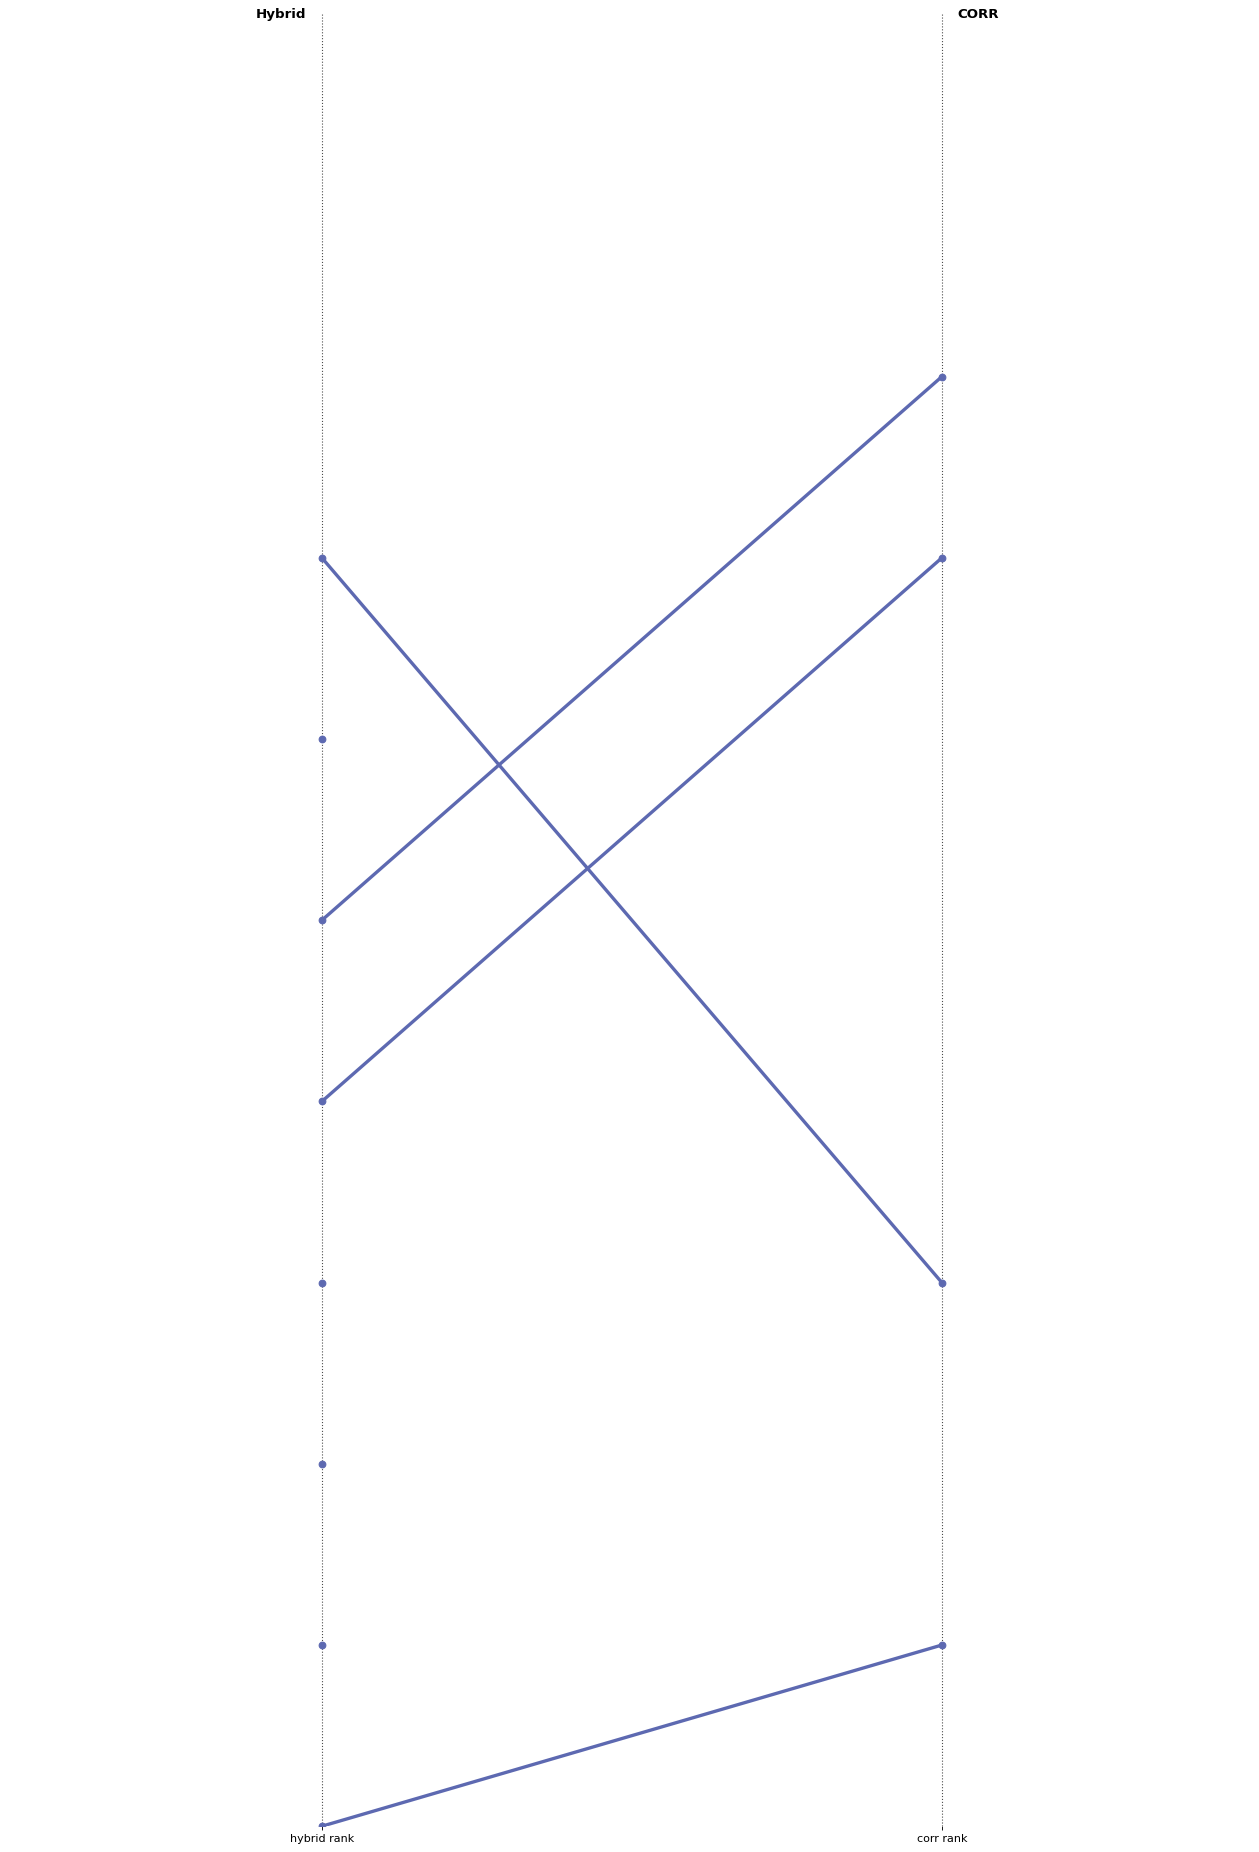

In [195]:
rank = []
for i in range(len(l)):
    if len(np.where((link_corr == list(l[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((link_corr == list(l[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'hybrid_rank':np.arange(len(l)), 'corr_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=10, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=10, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['corr_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['hybrid_rank'], ranks_merged['corr_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 10, 'Hybrid', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 10, 'CORR', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,10))
ax.set_xticks([1,3])
ax.set_xticklabels(["hybrid rank","corr rank" ])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

In [70]:
link = np.load("./link_rotated_station/link_corr_1976_2010_{}.npy".format(tau))

In [71]:
link = link[np.random.randint(link.shape[0], size=10), :]

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=500, min_samples_leaf = 50)
model.fit(x_train, y_train)


start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

In [72]:
math.sqrt(mean_squared_error(y_pred, y_test))/303

0.0661025986170915

In [111]:
l,b, m = ff.forward_feature_V(count, data_sst, link_caus, V, tau)

In [115]:
link = l

In [117]:
start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = m.predict(x_test)

In [118]:
math.sqrt(mean_squared_error(y_pred, y_test))/303

0.059864601857609626

In [119]:
l

array([[ 22,  -3],
       [ 93, -13],
       [ 11, -14],
       [ 14, -15],
       [ 66, -13],
       [ 12,  -9]])

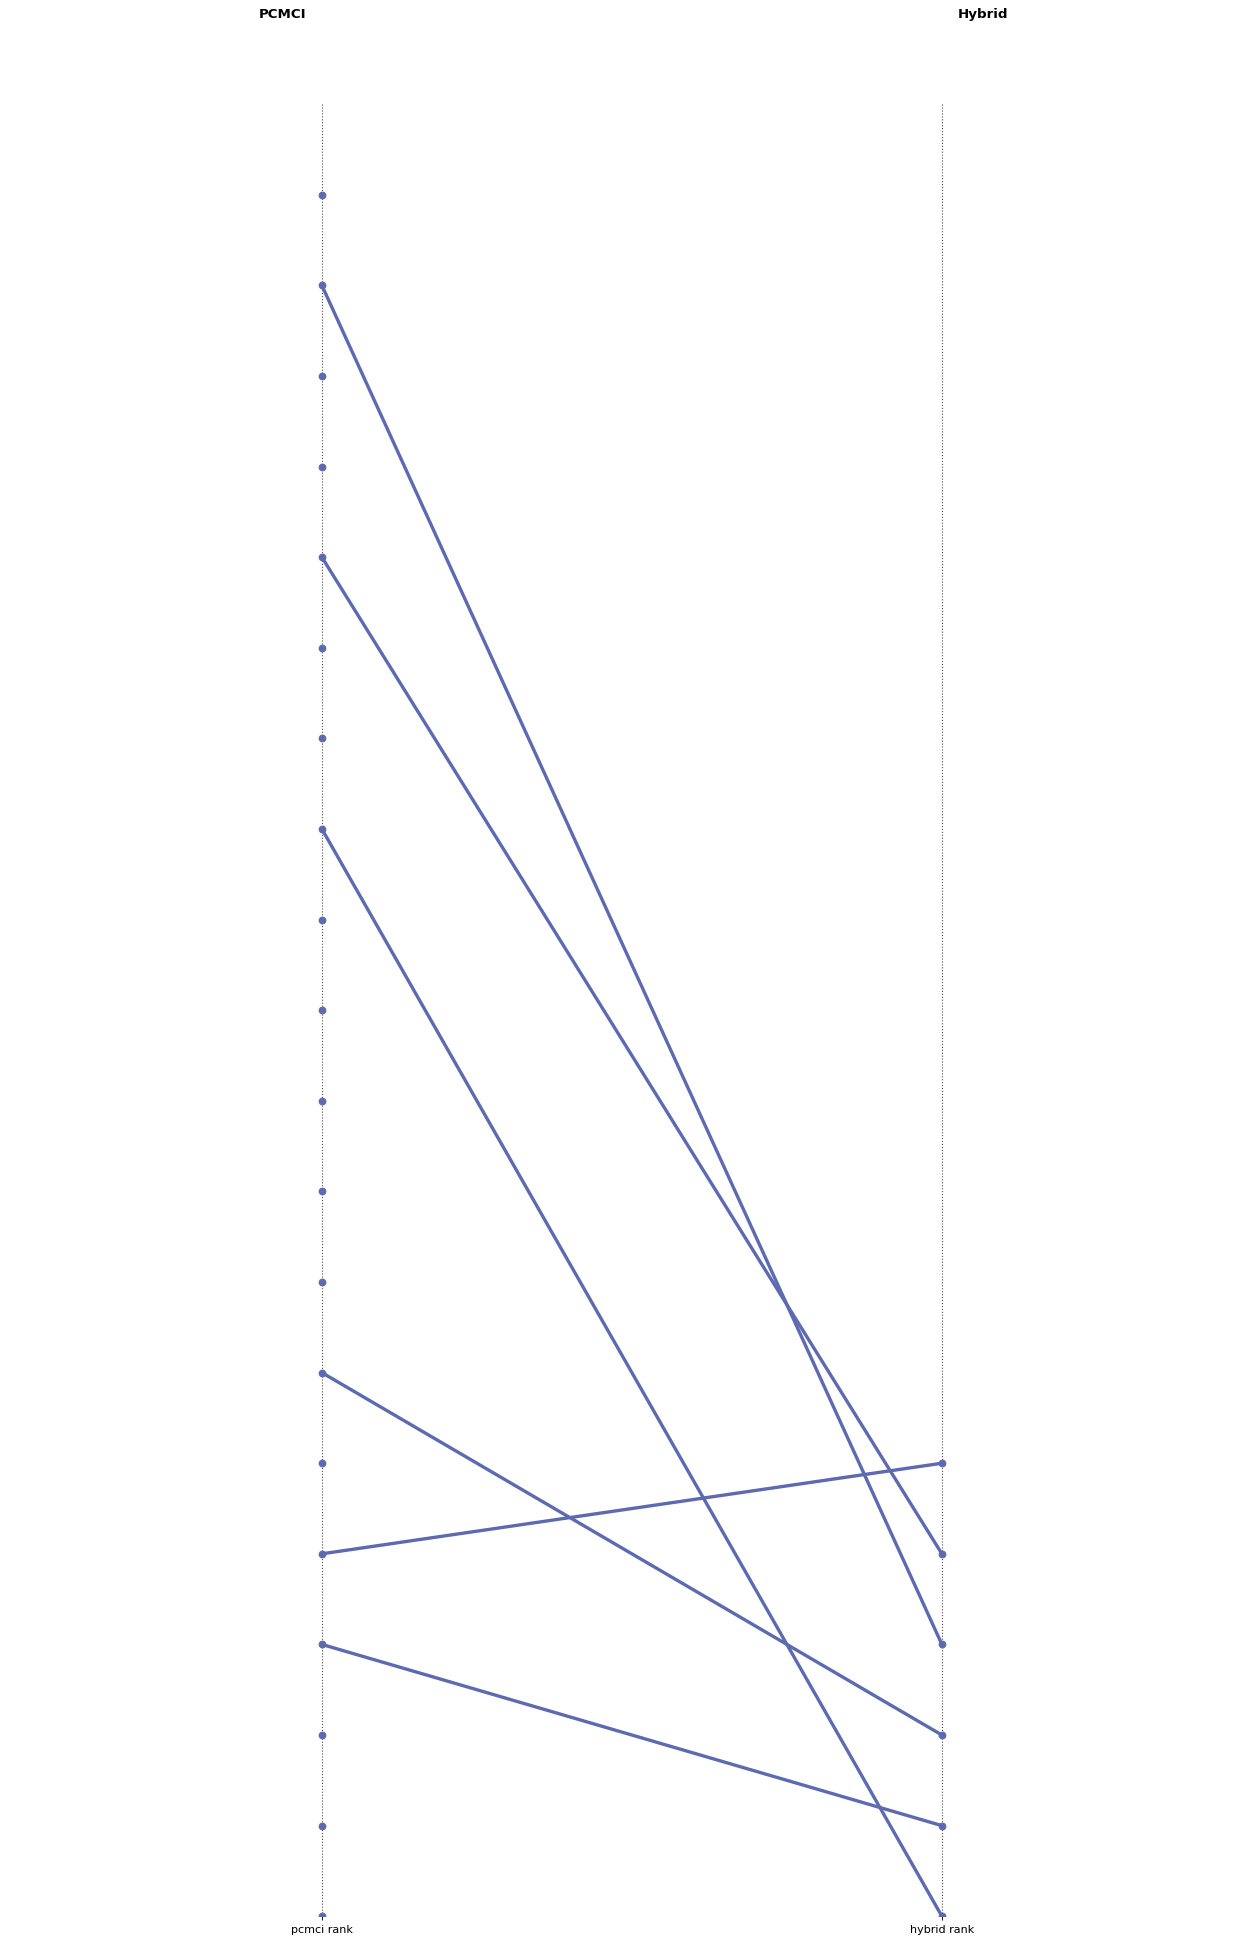

In [125]:
rank = []
for i in range(len(link_caus)):
    if len(np.where((l == list(link_caus[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((l == list(link_caus[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'parcorr_rank':np.arange(len(link_caus)), 'hybrid_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['parcorr_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['parcorr_rank'], ranks_merged['hybrid_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 21, 'PCMCI', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 21, 'Hybrid', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,20))
ax.set_xticks([1,3])
ax.set_xticklabels(["pcmci rank", "hybrid rank"])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

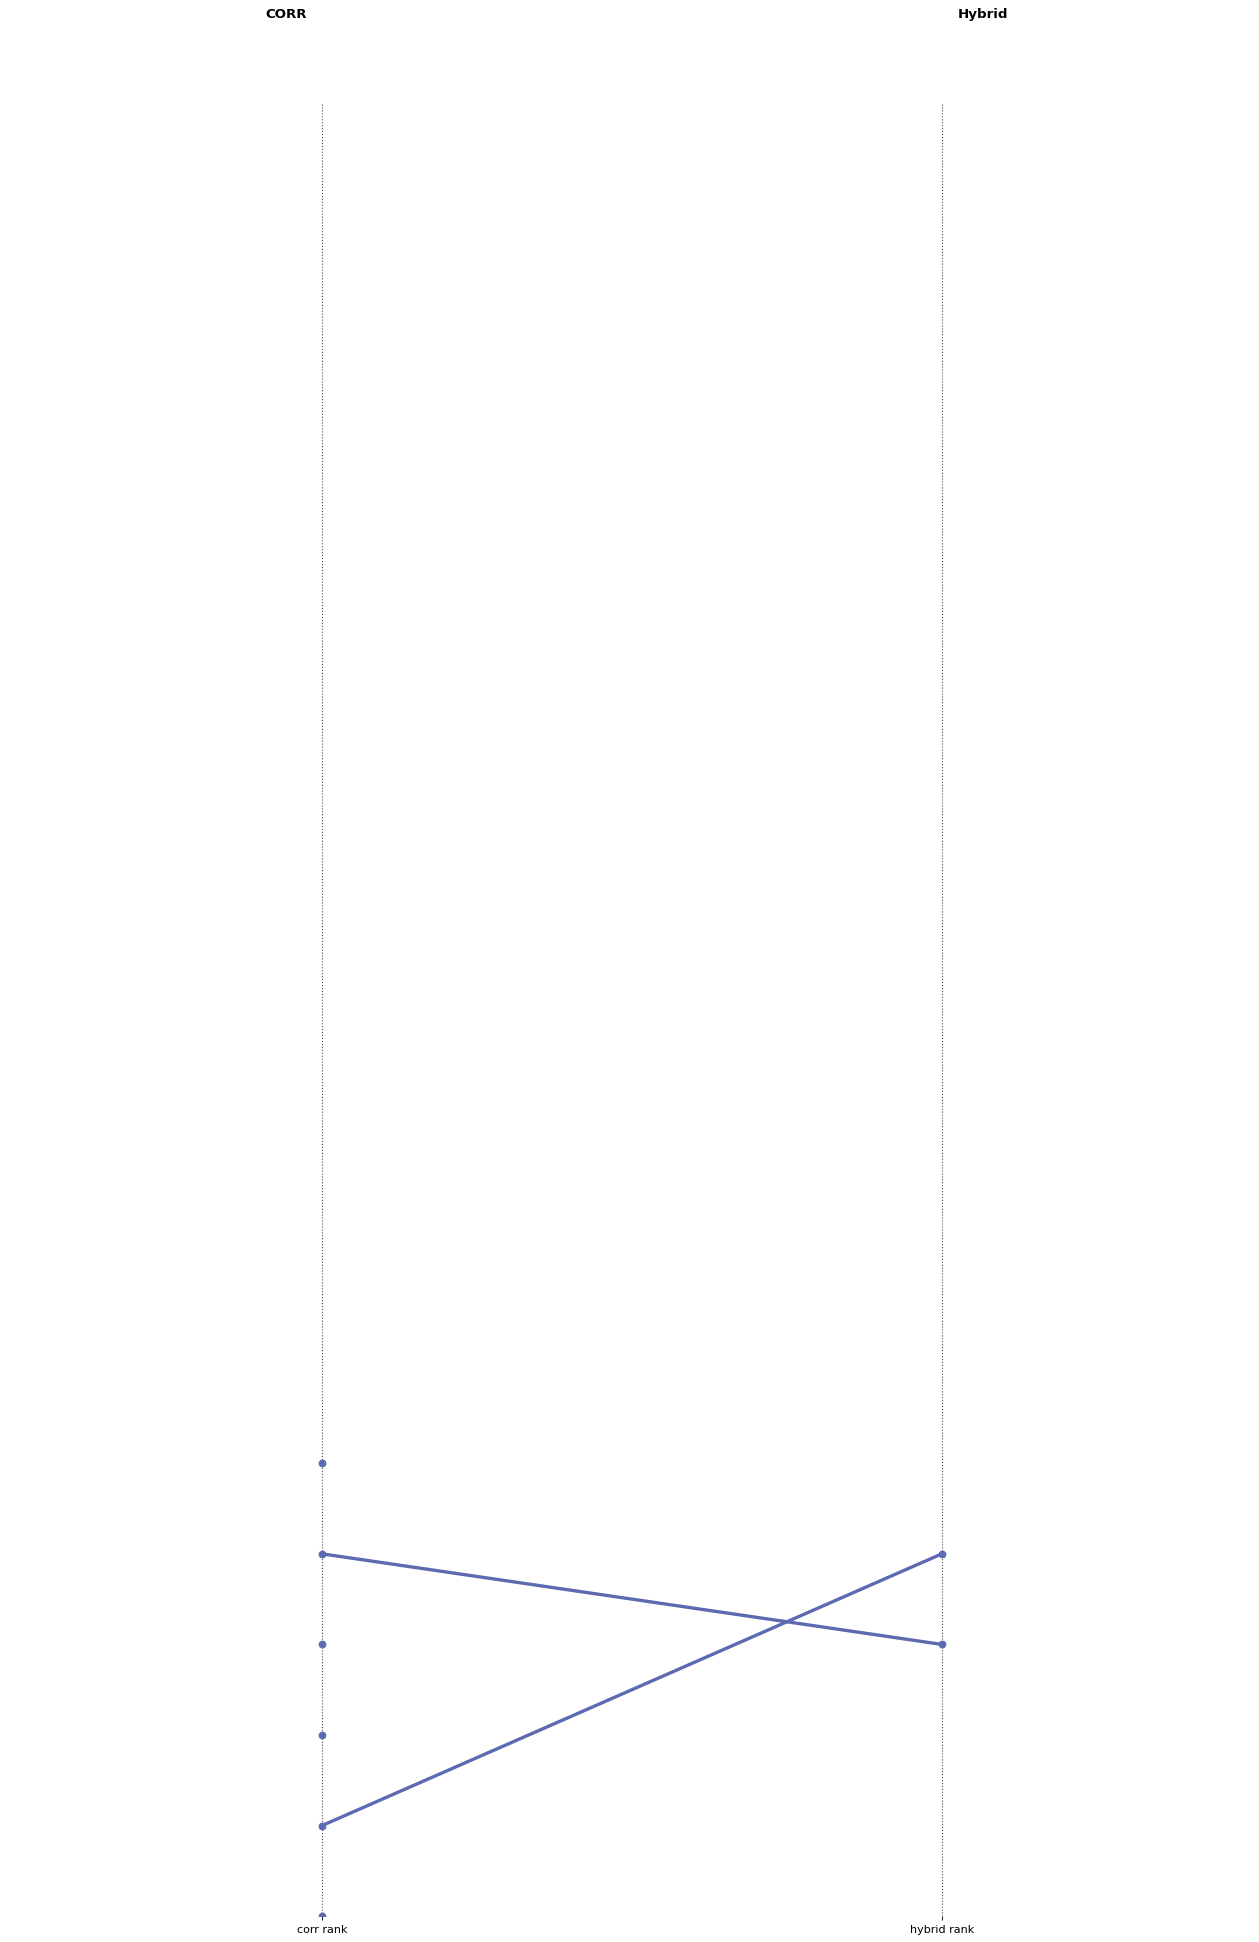

In [127]:
rank = []
for i in range(len(link_corr)):
    if len(np.where((l == list(link_corr[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((l == list(link_corr[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'corr_rank':np.arange(len(link_corr)), 'hybrid_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['corr_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['corr_rank'], ranks_merged['hybrid_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 21, 'CORR', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 21, 'Hybrid', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,20))
ax.set_xticks([1,3])
ax.set_xticklabels(["corr rank", "hybrid rank"])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

In [128]:
l

array([[ 22,  -3],
       [ 93, -13],
       [ 11, -14],
       [ 14, -15],
       [ 66, -13],
       [ 12,  -9]])